<a href="http://bokeh.pydata.org/"><img src="assets/images/bokeh-transparent.png" style="width:70px; float: left;"></a><h1>Bokeh Tutorial &mdash; <code>bokeh.charts</code> interface</h1>

---

The `charts` interface was completely re-written for `0.10`. Not all chart types have been ported over into the new format, and a `_legacy_charts` module remains for previous charts you might have used. Today we will only be demonstrating the new charts interface.


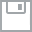
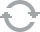
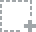
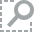
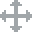
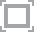
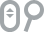
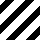
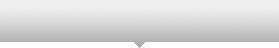
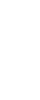
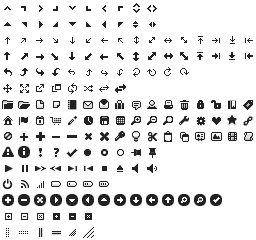
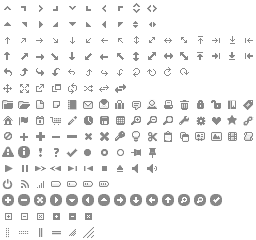
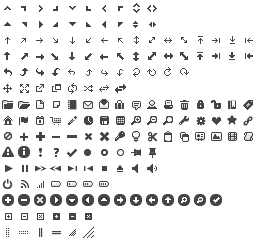
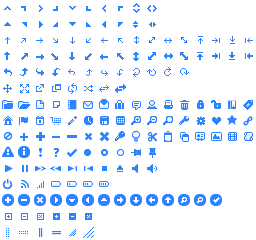
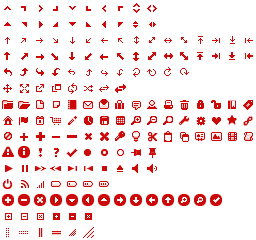
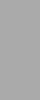
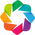
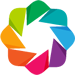

In [1]:
from bokeh.io import output_notebook, show
output_notebook()

# Chart inputs 

Supported inputs for charts are:
* Array-like - list, tuple, numpy.ndarray, pandas.Series
* Table-like - records: list(dict), columns: dict(list), pandas.DataFrame, blaze resource

Today, we're just going to work with pandas DataFrames, but all these examples should work with any appropriate data input.

In [2]:
from bokeh.sampledata.iris import flowers
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Scatter plot

In [3]:
from bokeh.charts import Scatter

p = Scatter(flowers, x='petal_length', y='petal_width', color='species', legend='top_left')
show(p)

In [4]:
p = Scatter(flowers, x='sepal_length', y='sepal_width', color='species', marker='species', legend='top_left')
show(p)

# Chart tools

Charts, come with a set of default tools, as seen above, we're going to use a subset of these moving forward, feel free to play with the tools to see what interactions you get out of the box.

In [5]:
# Possible tools are: box_select, box_zoom, click, crosshair, 
# help, hover, lasso_select, pan, poly_select, previewsave, 
# reset, resize, save, tap, wheel_zoom, 
# xpan, xwheel_zoom, ypan or ywheel_zoom
TOOLS = 'pan,box_zoom,reset,'

# Box

In [6]:
from bokeh.charts import BoxPlot
p = BoxPlot(
    flowers, label='species', values='petal_width', tools='crosshair',
    xlabel='', ylabel='petal width, mm', title='Distribution of petal widths'
)
show(p)

# Bar

In [7]:
from bokeh.sampledata.autompg import autompg
autompg.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


In [8]:
from bokeh.charts import Bar
p = Bar(
    autompg, label='yr', values='mpg', agg='median', 
    group='origin', # Use the group feature
    title="Median MPG by YR, grouped by ORIGIN", legend='top_left', tools='crosshair'
)
show(p)

In [9]:
from bokeh.charts import Bar
p = Bar(
    autompg, label='yr', values='mpg', agg='median', 
    stack='origin', # Use the stack feature
    title="Median MPG by YR, stacked by ORIGIN", legend='top_left', tools='crosshair'
)
show(p)

# Histogram

In [10]:
import pandas as pd
import numpy as np

# build some distributions
mu, sigma = 0, 0.5
normal = pd.DataFrame({'value': np.random.normal(mu, sigma, 1000), 'type': 'normal'})
lognormal = pd.DataFrame({'value': np.random.lognormal(mu, sigma, 1000), 'type': 'lognormal'})

# create a pandas data frame
df = pd.concat([normal, lognormal])
df[995:1005]

,type,value
995,normal,1.035638
996,normal,-0.758503
997,normal,0.805719
998,normal,-1.253977
999,normal,0.045442
0,lognormal,0.633237
1,lognormal,0.994970
2,lognormal,2.162434
3,lognormal,0.760505
4,lognormal,1.024579


In [11]:
from bokeh.charts import Histogram
hist = Histogram(df, values='value', color='type', bins=50, legend=True)
show(hist)

# Exercises

In [12]:
from bokeh.sampledata.us_marriages_divorces import data as marriages_divorces
marriages_divorces.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000,10000,36970000,9.7,0.3
1,1868,345000,10000,37885000,9.1,0.3
2,1869,348000,11000,38870000,9.0,0.3
3,1870,352000,11000,39905000,8.8,0.3
4,1871,359000,12000,41010000,8.8,0.3


Make a bar chart from the above data frame that looks like

<img src="assets/images/charts_line.png" style="width: 500px; float: left">

In [ ]:
from bokeh.charts import Line
line = Line?
show(line)

Check out varying the dash - https://github.com/bokeh/bokeh/blob/master/examples/charts/file/lines.py

---

In [13]:
from utils import get_medal_data
medals = get_medal_data()
medals.head()

,count,medal,name,country
0,1,bronze,Australia,AUS
1,2,silver,Australia,AUS
2,0,gold,Australia,AUS
3,1,bronze,Austria,AUT
4,6,silver,Austria,AUT


Make a bar chart from the above data frame that looks like

<img src="assets/images/charts_medal_stacked.png" style="width: 350px; float: left">

In [ ]:
bar = Bar(...)
show(bar)

Try tweaking the display and styling:

<img src="assets/images/charts_medal_stacked_colored.png" style="width: 350px; float: left">

In [ ]:
bar = Bar(...)
show(bar)

---

# Further reading

User guide: http://bokeh.pydata.org/en/latest/docs/user_guide/charts.html
Reference guide: http://bokeh.pydata.org/en/latest/docs/reference/charts.html

Examples of legacy charts, which will be brought into new interface soon:
* Area 
 * https://github.com/bokeh/bokeh/blob/master/examples/charts/file/area.py
 * https://github.com/bokeh/bokeh/blob/master/examples/charts/file/palettes.py
* Heatmap 
 * https://github.com/bokeh/bokeh/blob/master/examples/charts/file/cat_heatmap.py
 * https://github.com/bokeh/bokeh/blob/master/examples/charts/file/heatmap.py
* Donut
 * https://github.com/bokeh/bokeh/blob/master/examples/charts/file/donut.py
* Dots 
 * https://github.com/bokeh/bokeh/blob/master/examples/charts/file/dots.py
* Horizon 
 * https://github.com/bokeh/bokeh/blob/master/examples/charts/file/horizon.py
 * https://github.com/bokeh/bokeh/blob/master/examples/charts/file/horizon_folds.py
* Step
  * https://github.com/bokeh/bokeh/blob/master/examples/charts/file/steps.py

If you're interested in the development of this new interface:
* The PR: https://github.com/bokeh/bokeh/pull/2720
* The research document: https://github.com/bokeh/bokeh/wiki/Bokeh-Days-Working-Document